#### Importing the relevant libraries

In [3]:
# Inbuilt
import os

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [26]:
raw_train_df=pd.read_csv(
    os.path.join(os.path.pardir,'data','raw','train.csv'), low_memory=False, nrows=10000)
test_df = pd.read_csv(
    os.path.join(os.path.pardir,'data','raw','test.csv'), low_memory=False)

In [27]:
raw_train_df.info()
print("----------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
date_time                    10000 non-null object
site_name                    10000 non-null int64
posa_continent               10000 non-null int64
user_location_country        10000 non-null int64
user_location_region         10000 non-null int64
user_location_city           10000 non-null int64
orig_destination_distance    6271 non-null float64
user_id                      10000 non-null int64
is_mobile                    10000 non-null int64
is_package                   10000 non-null int64
channel                      10000 non-null int64
srch_ci                      9993 non-null object
srch_co                      9993 non-null object
srch_adults_cnt              10000 non-null int64
srch_children_cnt            10000 non-null int64
srch_rm_cnt                  10000 non-null int64
srch_destination_id          10000 non-null int64
srch_destination_type_id     10000 non-n

In [28]:

# drop unnecessary columns, these columns won't be useful in analysis and prediction
df = raw_train_df.drop(['date_time','site_name', 'user_location_region', 'user_location_city', 'orig_destination_distance', 
                              'user_id', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'cnt'], axis=1)
test_df    = test_df.drop(['date_time','site_name', 'user_location_region', 'user_location_city', 'orig_destination_distance', 
                              'user_id', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt'], axis=1)

In [29]:
raw_train_df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-27,2014-08-31,2,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-29,2014-09-02,2,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,9,2014-08-29,2014-09-02,2,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,21


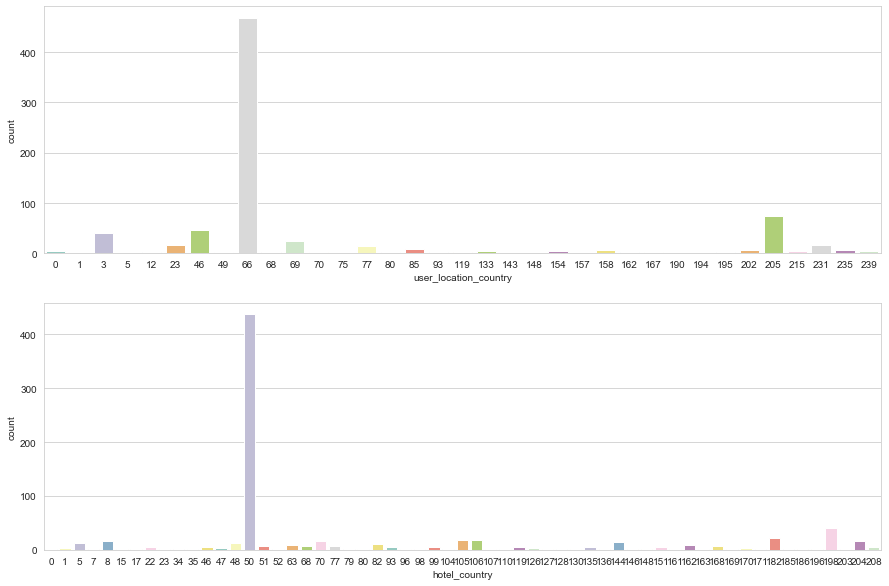

In [30]:
# Plot 

fig, (axis1,axis2) = plt.subplots(2,1,figsize=(15,10))

bookings_df = df[df["is_booking"] == 1]

# What are the most countries the customer travel from?
sns.countplot('user_location_country',data=bookings_df.sort_values(by=['user_location_country']),ax=axis1,palette="Set3")

# What are the most countries the customer travel to?
sns.countplot('hotel_country',data=bookings_df.sort_values(by=['hotel_country']),ax=axis2,palette="Set3")

# Combine both plots
# fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

# sns.distplot(bookings_df["hotel_country"], kde=False, rug=False, bins=25, ax=axis1)
# sns.distplot(bookings_df["user_location_country"], kde=False, rug=False, bins=25, ax=axis1)


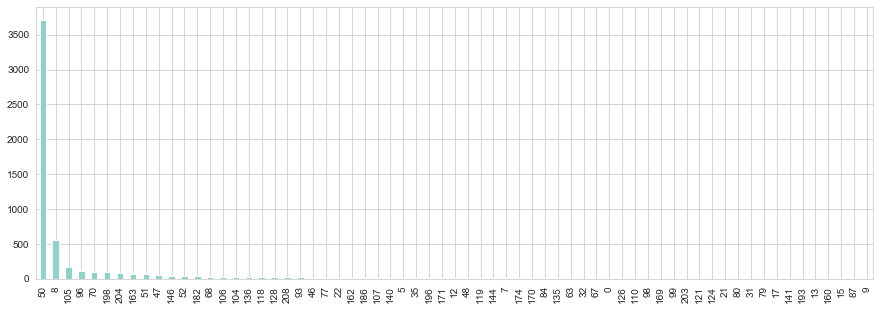

In [31]:
# Where do most of the customers from a country travel?
user_country_id = 66

fig, (axis1) = plt.subplots(1,1,figsize=(15,10))

country_customers = df[df["user_location_country"] == user_country_id]
country_customers["hotel_country"].value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

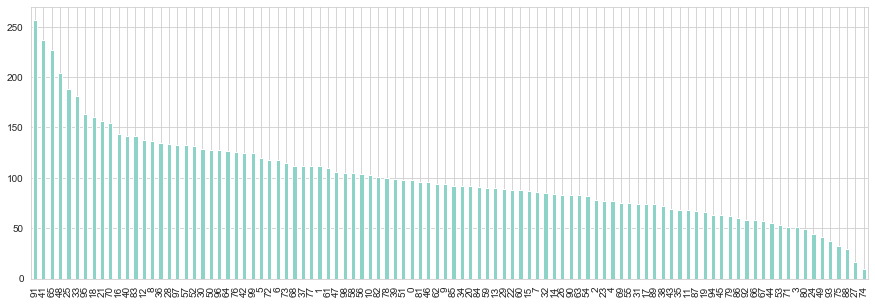

In [32]:
# Plot frequency for each hotel_clusters

df["hotel_cluster"].value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))


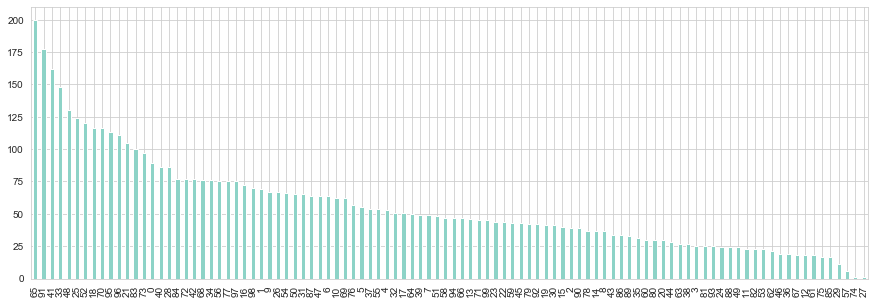

In [33]:
# What are the most frequent hotel clusters booked by customers from a country?
user_country_id = 66

fig, (axis1) = plt.subplots(1,1,figsize=(15,10))

customer_clusters = df[df["user_location_country"] == user_country_id]["hotel_cluster"]
customer_clusters.value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

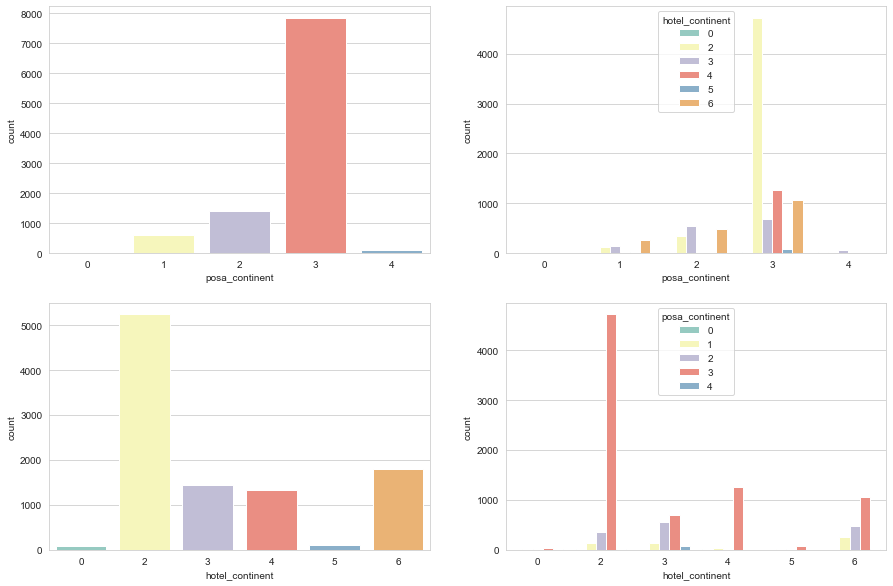

In [34]:
# Plot post_continent & hotel_continent

fig, ((axis1,axis2),(axis3,axis4)) = plt.subplots(2,2,figsize=(15,10))

# Plot frequency for each posa_continent
sns.countplot('posa_continent', data=df,order=[0,1,2,3,4],palette="Set3",ax=axis1)

# Plot frequency for each posa_continent decomposed by hotel_continent
sns.countplot('posa_continent', hue='hotel_continent',data=df,order=[0,1,2,3,4],palette="Set3",ax=axis2)

# Plot frequency for each hotel_continent
sns.countplot('hotel_continent', data=df,order=[0,2,3,4,5,6],palette="Set3",ax=axis3)

# Plot frequency for each hotel_continent decomposed by posa_continent
sns.countplot('hotel_continent', hue='posa_continent', data=df, order=[0,2,3,4,5,6],palette="Set3",ax=axis4);

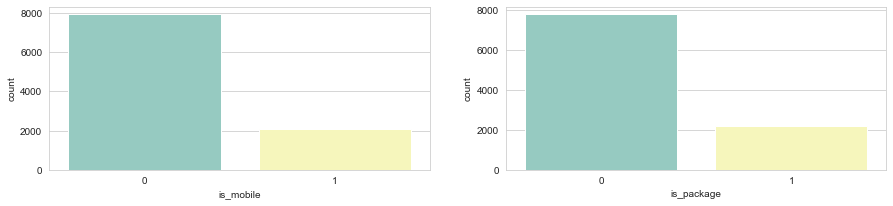

In [36]:

# Plot frequency of is_mobile & is_package

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,3))

# What's the frequency of bookings through mobile?
sns.countplot(x='is_mobile',data=df, order=[0,1], palette="Set3", ax=axis1)

# What's the frequency of bookings with package?
sns.countplot(x='is_package',data=df, order=[0,1], palette="Set3", ax=axis2);

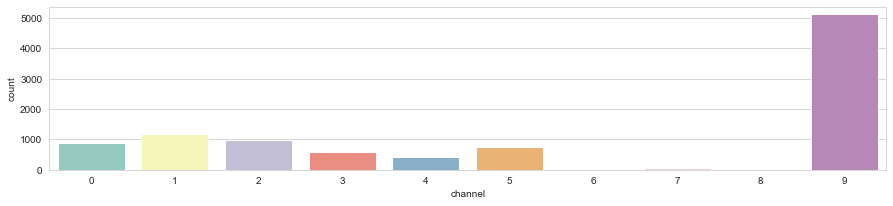

In [38]:
# What's the most impactful channel?

fig, (axis1) = plt.subplots(1,1,figsize=(15,3))

sns.countplot(x='channel', order=list(range(0,10)), data=df, palette="Set3");

In [40]:
df.describe(include="all")

,posa_continent,user_location_country,is_mobile,is_package,channel,srch_ci,srch_destination_id,srch_destination_type_id,is_booking,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,9993,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,NaN,NaN,NaN,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,2014-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.744400,85.711700,0.206600,0.220100,5.70210,NaN,14807.539200,2.641100,0.077700,3.149200,80.198000,575.825700,49.120100
std,0.590511,61.545901,0.404886,0.414335,3.59959,NaN,11454.009352,2.203446,0.267712,1.539213,55.267289,494.452768,28.705492
min,0.000000,0.000000,0.000000,0.000000,0.00000,NaN,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,66.000000,0.000000,0.000000,2.00000,NaN,8268.000000,1.000000,0.000000,2.000000,50.000000,142.000000,25.000000
50%,3.000000,66.000000,0.000000,0.000000,9.00000,NaN,10970.500000,1.000000,0.000000,2.000000,50.000000,544.000000,48.000000
75%,3.000000,69.000000,0.000000,0.000000,9.00000,NaN,18714.000000,5.000000,0.000000,4.000000,105.000000,700.000000,73.000000


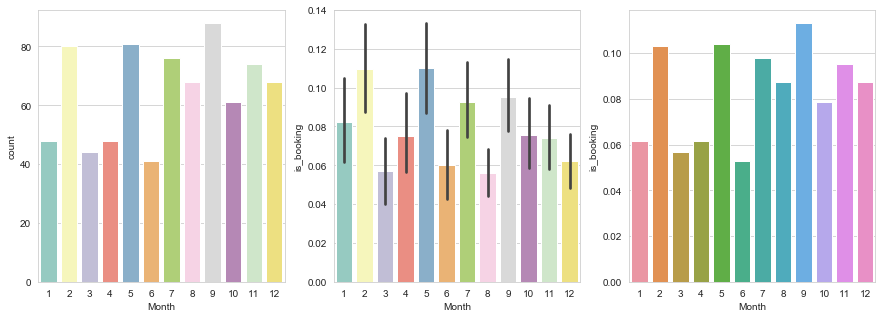

In [42]:
# Convert srch_ci to Year, Month, and Week

df['Year']   = df['srch_ci'].apply(lambda x: int(str(x)[:4]) if x == x else np.nan)
df['Month']  = df['srch_ci'].apply(lambda x: int(str(x)[5:7]) if x == x else np.nan)
df['Week']   = df['srch_ci'].apply(lambda x: int(str(x)[8:10]) if x == x else np.nan)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,sharex=True,figsize=(15,5))

# Plot How many bookings in each month
sns.countplot('Month',data=df[df["is_booking"] == 1],order=list(range(1,13)),palette="Set3",ax=axis1)

# Plot The percentage of bookings of each month(sum of month bookings / count of bookings(=1 OR =0) of a month)
# sns.factorplot('Month',"is_booking",data=df, order=list(range(1,13)), palette="Set3",ax=axis2)
sns.barplot('Month',"is_booking",data=df, order=list(range(1,13)), palette="Set3",ax=axis2)

# Plot The percentage of bookings of each month compared to all bookings(sum of month bookings / count of bookings(=1) of all months)
month_sum = df[['Month', 'is_booking']].groupby(['Month'],as_index=False).sum()
month_sum['is_booking'] = month_sum['is_booking'] / len(df[df['is_booking'] == 1])

sns.barplot(x='Month', y='is_booking', order=list(range(1,13)), data=month_sum,ax=axis3);


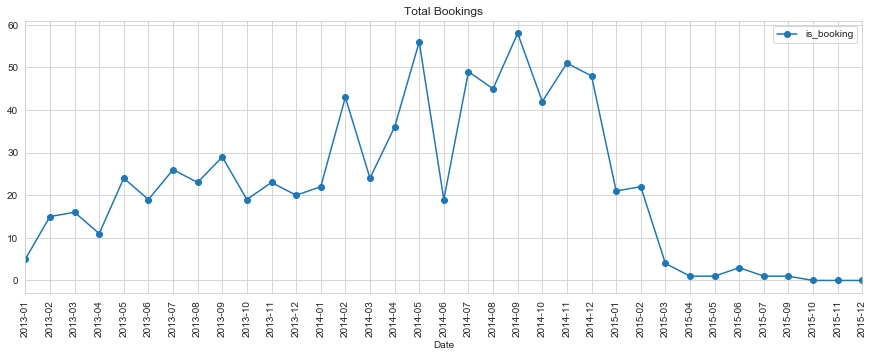

In [44]:
# Convert srch_ci column to Date(Y-M)
df['Date']  = df['srch_ci'].apply(lambda x: (str(x)[:7]) if x == x else np.nan)

# Plot number of bookings over Date
date_bookings  = df.groupby('Date')["is_booking"].sum()
ax1 = date_bookings.plot(legend=True,marker='o',title="Total Bookings", figsize=(15,5))
ax1.set_xticks(range(len(date_bookings)))
xlabels = ax1.set_xticklabels(date_bookings.index.tolist(), rotation=90)

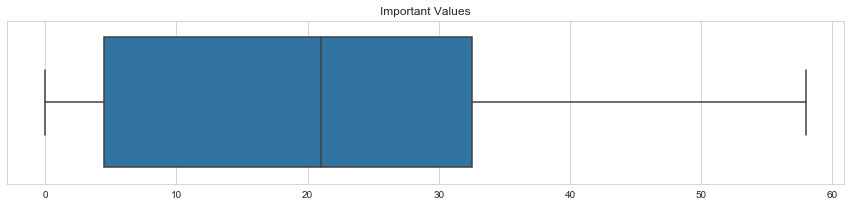

In [45]:
# .... continue with plot Date column

# Plot important values(min,max,quartiles) for number of bookings over Date
fig, (axis1) = plt.subplots(1,1,figsize=(15,3))

ax2 = sns.boxplot([date_bookings.values], whis=np.inf,ax=axis1)
ax2.set_title('Important Values');

In [46]:
# Correlation between hotel_country in number of bookings through 2013, 2014, & 2015

hotel_country_piv = pd.pivot_table(df,values='is_booking', index='Date', columns=['hotel_country'],aggfunc='sum')
hotel_country_piv= hotel_country_piv.fillna(0)
hotel_country_piv.head()

hotel_country,0,1,5,7,8,9,11,12,13,15,17,21,22,23,26,...,169,170,171,174,180,182,185,186,193,196,198,200,203,204,208
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2013-03,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2013-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2013-05,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


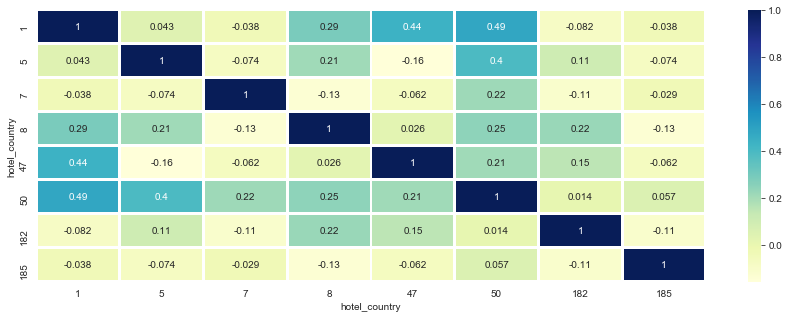

In [57]:
# .... continue Correlation

# Plot correlation between range of hotel_country
country_ids = [1,5,7,8,47,50,182,185]

fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

# using summation of booking values for each hotel_country 
sns.heatmap(hotel_country_piv[country_ids].corr(),annot=True,linewidths=2,cmap="YlGnBu");

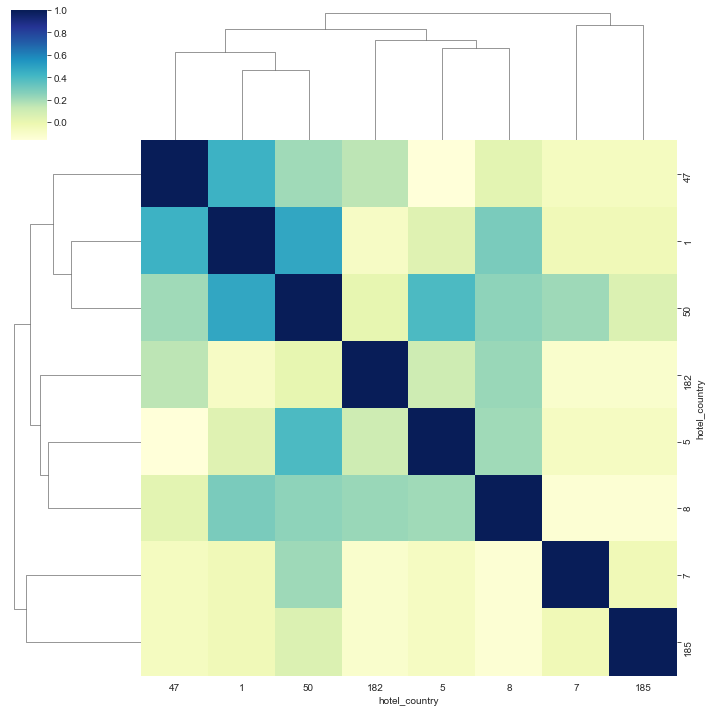

In [49]:
# .... continue Correlation

# Reformat the heatmap so similar hotel_country are next to each other
sns.clustermap(hotel_country_piv[country_ids].corr(), cmap="YlGnBu");

In [52]:
# Define training and testing sets

train_df = pd.read_csv(os.path.join(os.path.pardir,'data','raw','train.csv'),
                       usecols=['is_booking', 'srch_destination_id', 'hotel_cluster'], nrows=30000)
test_df  = test_df[['id', 'srch_destination_id']]


In [53]:
# Group by srch_destination_id & hotel_cluster
# Then for each destination id & hotel cluster, compute summation of bookings, and count number of clicks(no-booking)

train_df = train_df.groupby(['srch_destination_id','hotel_cluster'])['is_booking'].agg(['sum','count'])
train_df['count'] = train_df['count'] - train_df['sum']
train_df.rename(columns={'sum': 'sum_bookings', 'count': 'clicks'}, inplace=True)

# For each destination id & hotel cluster, 
# the relevance will be the number of bookings made + number of clicks(no-bookings) * 0.1
# meaning for every 10 clicks, they will be counted as 1 booking

train_df['relevance'] = train_df['sum_bookings'] + (train_df['clicks'] * 0.1)

In [54]:
# For each srch_destination_id group, get top 5 hotel clusters with max relevance

def get_top_clusters(group):
    indexes = group.relevance.nlargest(5).index
    top_clusters = group.hotel_cluster[indexes].values
    if(len(top_clusters) < 5):
        top_clusters = (list(top_clusters) + list(ferq_clusters.index))[:5]
    return np.array_str(np.array(top_clusters))[1:-1]

train_df      = train_df.reset_index()
ferq_clusters = train_df['hotel_cluster'].value_counts()[:5]
top_clusters  = train_df.groupby(['srch_destination_id']).apply(get_top_clusters)

In [55]:
# Create top_clusters_df

top_clusters_df = pd.DataFrame(top_clusters).rename(columns={0: 'hotel_cluster'})
top_clusters_df.head()

,hotel_cluster
srch_destination_id,
11,94 91 48 42 30
14,75 91 48 42 30
16,7 91 48 42 30
19,40 20 30 61 91
21,46 3 30 36 44


In [56]:
# Merge test_df with top_clusters_df

# For every destination id in test_df, merge it with the corresponding id in top_clusters_df 
test_df = pd.merge(test_df, top_clusters_df, how='left',left_on='srch_destination_id', right_index=True)

# Fill NaN values with most frequent clusters
test_df.hotel_cluster.fillna(np.array_str(ferq_clusters.index)[1:-1],inplace=True)

Y_pred = test_df["hotel_cluster"]